In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [8]:
for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Figure3.data_to_barchart'):
#     print subdir
#     if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 4:
        print subdir, len(os.listdir(subdir))
        
#         classifier = subdir.split('/')[-1]
#         dataset = subdir.split('/')[-2]
#         experiment = subdir.split('/')[-3]
        
#         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [ ]:
for f in *_XCEPTION_True.sbatch; do sbatch $f; done

In [18]:
import glob
import cPickle as pickle

In [53]:
experiment = 'C.Figure3.data_to_barchart'
e_dir = os.path.join(RESULTS_DIR, experiment)
datasets = sorted(os.listdir(e_dir))

bar_stats = [None]*4

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    bar_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = ['01_noise.p', '02_noise.p']#glob.glob(os.path.join(d_dir, c)+'/*.p')
    stats_per_c = []

    for s in stats_files:

        with open(os.path.join(c_dir)+'/'+s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    bar_stats[i].append(stats_per_c)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

In [54]:
bar_mlp_loss1 = bar_stats[0][0][0]['loss']
bar_mlp_loss2 = bar_stats[0][0][1]['loss']

In [57]:
experiment = 'C.Figure3.data_to_piechart'
e_dir = os.path.join(RESULTS_DIR, experiment)
datasets = sorted(os.listdir(e_dir))

pie_stats = [None]*4

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    pie_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = ['01_noise.p', '02_noise.p']#glob.glob(os.path.join(d_dir, c)+'/*.p')
    stats_per_c = []

    for s in stats_files:

        with open(os.path.join(c_dir)+'/'+s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    pie_stats[i].append(stats_per_c)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

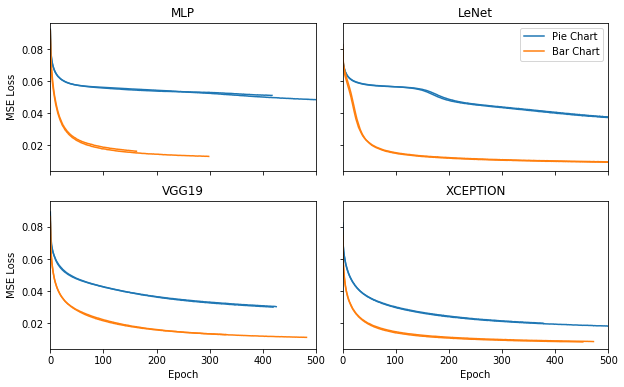

In [119]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    bar_mlp_loss1 = bar_stats[i][0][0]['loss']
    bar_mlp_loss2 = bar_stats[i][0][1]['loss']
    pie_mlp_loss1 = pie_stats[i][0][0]['loss']
    pie_mlp_loss2 = pie_stats[i][0][1]['loss']


    plot(pie_mlp_loss1, label='Pie Chart', color='C0')
    plot(pie_mlp_loss2, color='C0')
    plot(bar_mlp_loss1, label='Bar Chart', color='C1')
    plot(bar_mlp_loss2, color='C1')    
    plt.xlim(0,500)
    plt.title(c)


    if i == 1:
        plt.legend()

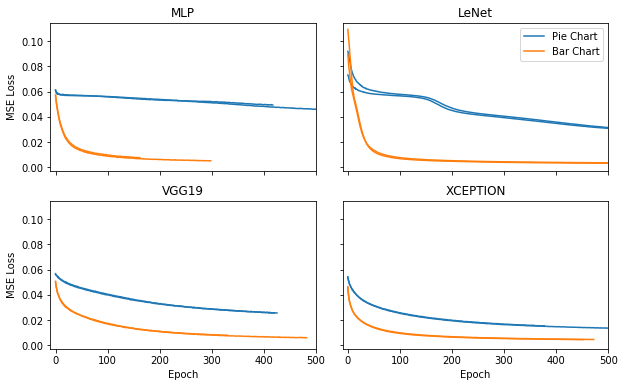

In [166]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    bar_mlp_loss1 = bar_stats[i][0][0]['val_loss']
    bar_mlp_loss2 = bar_stats[i][0][1]['val_loss']
    pie_mlp_loss1 = pie_stats[i][0][0]['val_loss']
    pie_mlp_loss2 = pie_stats[i][0][1]['val_loss']


    plot(pie_mlp_loss1, label='Pie Chart', color='C0')
    plot(pie_mlp_loss2, color='C0')
    plot(bar_mlp_loss1, label='Bar Chart', color='C1')
    plot(bar_mlp_loss2, color='C1')    
    plt.xlim(-10,500)
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/figure3_val_loss.pdf', bbox_inches='tight', pad_inches=0)

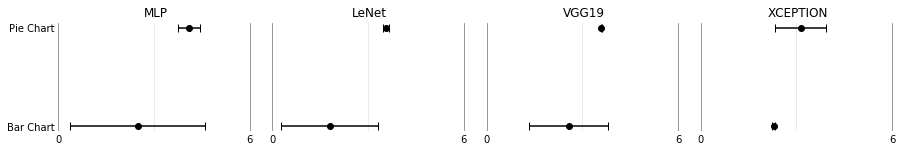

In [164]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, (m-h), m+h, h

fig = plt.figure(figsize=(15,2), facecolor='white')
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1], wspace=.1)
# experiments = [experiments[1]]

# print experiments

j = 0
for i, c in enumerate(classifiers):

    fig = plt.subplot(gs[j])
    j += 1
    plt.title(c)


    #
    # data
    #
    labels = ['Pie Chart', 'Bar Chart']#all_labels[experiment]

    bar_mlae1 = bar_stats[i][0][0]['MLAE']
    bar_mlae2 = bar_stats[i][0][1]['MLAE']
    pie_mlae1 = pie_stats[i][0][0]['MLAE']
    pie_mlae2 = pie_stats[i][0][1]['MLAE']        

    data = [[pie_mlae1, pie_mlae2], [bar_mlae1, bar_mlae2]]#all_results[experiment][i-1]
    means = [np.mean(r) for r in data]

    confidence = [mean_confidence_interval(r)[3] for r in data]

    plt.xlim(0,6.1)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    if i != 0:
        ax.get_yaxis().set_ticks([])

    ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
    ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
    ax.tick_params(axis=u'both', which=u'both',length=0)


    # grid lines for X
    plt.grid(True, color='gray', which='major', axis='x', alpha=1)
    plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)

    errorbars = plt.errorbar(means, labels, xerr=confidence, fmt='o', color='black', capsize=4)

plt.savefig('../PAPER/gfx/figure3_mlae.pdf', bbox_inches='tight', pad_inches=0)

In [16]:
results

[[[4.1199495530726864, 4.0659901250496953]],
 [[3.550196981887705, 3.5635542681667762]],
 [[3.5876756686080968, 3.5905292590178473]],
 [[3.0650640356036405, 3.1930074643640447]]]

In [28]:
all_times

[[[4238.421066045761, 5655.236675977707]],
 [[18043.04216504097, 17468.488629102707]],
 [[3904.081511259079, 3942.0157470703125]],
 [[6614.907017946243, 4273.838746786118]]]

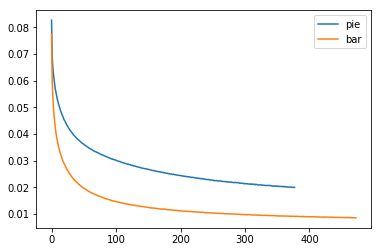

In [35]:
plot(stats['loss'], label='pie')
plot(stats2['loss'], label='bar')
plt.legend()

<Container object of 3 artists>

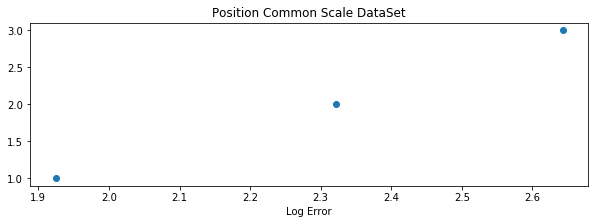

In [126]:

plt.figure(figsize=(10,3))
plt.title('Position Common Scale DataSet')
plt.xlabel('Classifier')
plt.xlabel('Log Error')

means = [np.mean(r) for r in results[3]]

plt.errorbar(means, [1,2,3], xerr=None, fmt='o')

# boxplot = plt.plot(results[0], '-')#, vert=False, notch=False, labels=[0,1,2], showfliers=False)

In [70]:
means

[3.0134362250159592, 4.9537083508647513, 4.8587184571994264]

In [72]:
x,y,yerr = rand(3,10)


In [78]:
means

[3.0134362250159592, 4.9537083508647513, 4.8587184571994264]

In [79]:
results[0]

[[3.4371376507239724, 2.589734799307946],
 [4.9569597644077756, 4.9504569373217278],
 [4.9911288314507596, 4.7263080829480923]]

In [81]:
np.std(results[0][0])

0.42370142570801317

In [121]:
import numpy as np, scipy.stats as st

cints = np.zeros((2, len(results[1])))

for z,r in enumerate(results[1]):
    print r
    m,i,j = mean_confidence_interval(r)
    cints[0,z] = i
    cints[1,z] = j

[1.7975809878019353, 1.5491893653924598]
[2.9174054981466879, 2.3409907352282753]
[3.4120250038421158, 3.1797806452814772]


In [123]:
cints

array([[ 0.09532777, -1.03282388,  1.82043064],
       [ 3.25144258,  6.29122011,  4.77137501]])

In [99]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [103]:
mean_confidence_interval(results[0][1])

(4.9537083508647513, 4.912395224704281, 4.9950214770252215)

In [104]:
results[0]

[[3.4371376507239724, 2.589734799307946],
 [4.9569597644077756, 4.9504569373217278],
 [4.9911288314507596, 4.7263080829480923]]